In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import asyncio
import nest_asyncio


In [2]:
def get_data():
    response = requests.get('http://localhost:8000/tvl/1').json()
    df = pd.DataFrame(response['tvl'])
    return df

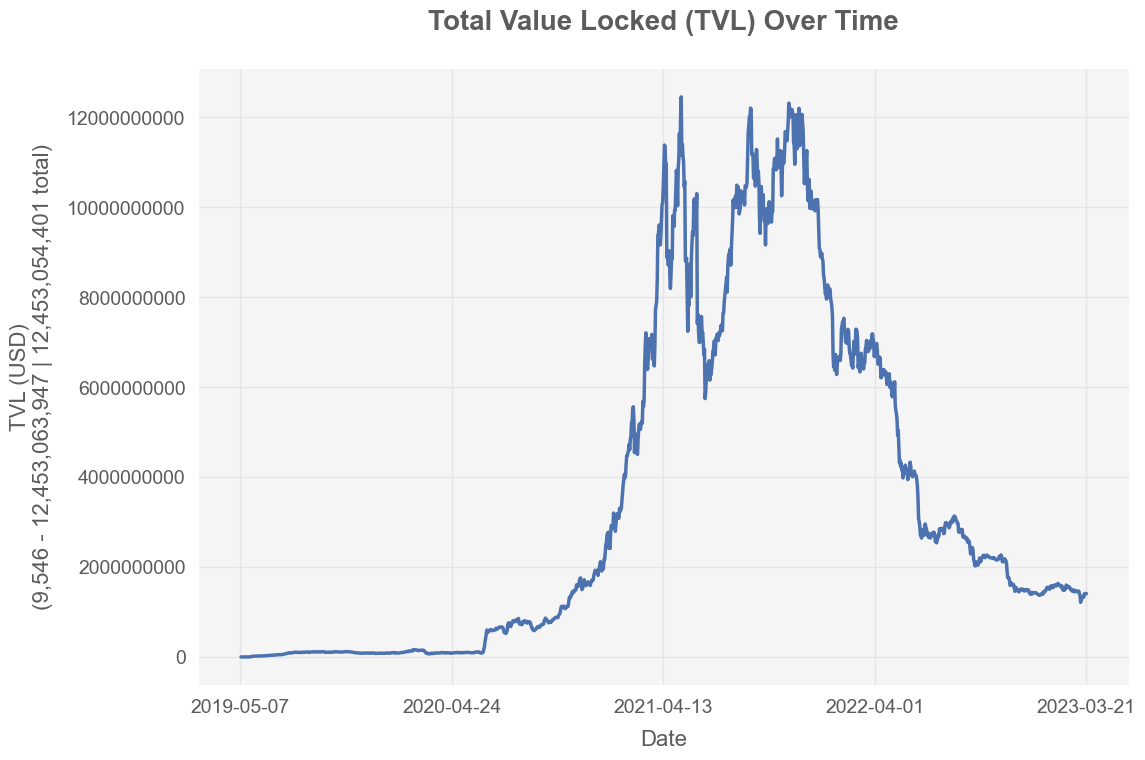

In [3]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8), 'axes.facecolor':'#f5f5f5', 'axes.edgecolor':'#5c5c5c', 
            'axes.labelcolor': '#5c5c5c', 'axes.grid':True, 'grid.color': '#e5e5e5', 
            'xtick.color': '#5c5c5c', 'ytick.color': '#5c5c5c', 'font.family': 'sans-serif', 
            'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'], 
            'text.color': '#5c5c5c'})

df = get_data()
df['date'] = pd.to_datetime(df['date']) 

sns.lineplot(x='date', y='tvl', data=df, linewidth=2.5, color='#4c72b0')

plt.title("Total Value Locked (TVL) Over Time", fontsize=20, fontweight='bold', y=1.05)
plt.xlabel("Date", fontsize=16, labelpad=10)
plt.ylabel("TVL (USD)", fontsize=16, labelpad=10)
plt.xticks(fontsize=14)

# Set x-axis tick labels
start_date = df['date'].min().strftime('%Y-%m-%d')
end_date = df['date'].max().strftime('%Y-%m-%d')
num_ticks = 5
tick_labels = pd.date_range(start_date, end_date, num_ticks).strftime('%Y-%m-%d')
plt.xticks(ticks=pd.date_range(start_date, end_date, num_ticks), labels=tick_labels)

# Remove scientific notation from y-axis labels
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Set y-axis label to value range
y_min = df['tvl'].min()
y_max = df['tvl'].max()
y_range = y_max - y_min
plt.ylabel(f"TVL (USD)\n({y_min:,.0f} - {y_max:,.0f} | {y_range:,.0f} total)", fontsize=16, labelpad=10)

plt.yticks(fontsize=14)

sns.despine(left=True, bottom=True)
plt.savefig("tvl_over_time.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import os
import discord
from discord.ext import commands

intents = discord.Intents.default()
intents.messages = True
intents.guilds = True
intents.message_content = True


bot = commands.Bot(command_prefix="!", intents=intents)

@bot.event
async def on_ready():
    print(f"Bot is ready as {bot.user.name}")

@bot.command()
async def send_image(ctx, channel_id: int = 1088149802983903270, image_path="tvl_over_time.png"):
    target_channel = bot.get_channel(channel_id)
    
#     os.getenv('')

    if target_channel is None:
        await ctx.send("Invalid channel ID. Please provide a valid channel ID.")
        return

    if not os.path.exists(image_path):
        await ctx.send("Image not found. Please provide a valid file path.")
        return

    _, file_extension = os.path.splitext(image_path)
    if file_extension.lower() not in [".png", ".jpg", ".jpeg", ".gif"]:
        await ctx.send("Invalid file format. Please provide a valid image file.")
        return

    try:
        with open(image_path, "rb") as f:
            picture = discord.File(f)
            await target_channel.send(file=picture)
    except Exception as e:
        print(f"Error sending image: {e}")
        await ctx.send("An error occurred while trying to send the image.")
        
nest_asyncio.apply()

bot.run("MTA4ODE1MzExNTEzNzY3MTMwOQ.G14bBv.0cP7mq9ydPku2dicHiCpSFS-fiUr-nZlOGAraY")


2023-03-22 17:15:12 INFO     discord.client logging in using static token
2023-03-22 17:15:12 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 4fae5ebd6108fd8f843603ed159c8410).


Bot is ready as Defi-Central


2023-03-22 17:57:18 WARNING  discord.http We are being rate limited. POST https://discord.com/api/v10/channels/1088219875442425857/messages responded with 429. Retrying in 0.98 seconds.
2023-03-22 17:57:19 WARNING  discord.http We are being rate limited. POST https://discord.com/api/v10/channels/1088219875442425857/messages responded with 429. Retrying in 0.91 seconds.
2023-03-22 17:57:20 WARNING  discord.http We are being rate limited. POST https://discord.com/api/v10/channels/1088219875442425857/messages responded with 429. Retrying in 0.91 seconds.
2023-03-22 18:00:37 WARNING  discord.http We are being rate limited. POST https://discord.com/api/v10/channels/1088149802983903270/messages responded with 429. Retrying in 0.62 seconds.
2023-03-22 18:00:38 WARNING  discord.http We are being rate limited. POST https://discord.com/api/v10/channels/1088149802983903270/messages responded with 429. Retrying in 0.53 seconds.
2023-03-22 18:00:39 WARNING  discord.http We are being rate limited. P

Bot is ready as Defi-Central


2023-03-22 18:39:51 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 18:39:56 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 9dce5c4393ce13cc588c1ffdf9c34117).


Bot is ready as Defi-Central


2023-03-22 18:56:09 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 18:56:14 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: a933b5845ab46d665694b96d1f93842c).


Bot is ready as Defi-Central


2023-03-22 19:38:51 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 19:55:43 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 20:12:08 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 20:27:19 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 20:43:24 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:00:36 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:17:19 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:27:04 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:27:14 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:27:24 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-22 21:27:30 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: be7fbb310009c

Bot is ready as Defi-Central


2023-03-22 22:16:55 INFO     discord.gateway Shard ID None has successfully RESUMED session be7fbb310009c9e41ccf13e7c7875816.
2023-03-23 01:14:28 INFO     discord.gateway Shard ID None has successfully RESUMED session be7fbb310009c9e41ccf13e7c7875816.
2023-03-23 01:33:11 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 01:50:10 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 02:06:11 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 02:06:16 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 9bbad179130bae0a516db6e3fc5a1367).


Bot is ready as Defi-Central


2023-03-23 03:28:27 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 03:45:02 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 04:02:24 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 04:18:48 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 04:34:52 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 04:52:05 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 05:07:48 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 05:24:05 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 05:41:16 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 05:57:46 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 06:13:35 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 06:29:06 I

Bot is ready as Defi-Central


2023-03-23 09:50:00 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 09:50:06 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 7e8766044dc1480f8ba4570456ad2618).


Bot is ready as Defi-Central


2023-03-23 10:04:24 INFO     discord.gateway Shard ID None has successfully RESUMED session 7e8766044dc1480f8ba4570456ad2618.
2023-03-23 10:23:25 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 10:23:33 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 10:23:38 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: fc3bff47d10e75f3d28400ddbadf8a57).


Bot is ready as Defi-Central


2023-03-23 10:46:04 INFO     discord.gateway Shard ID None session has been invalidated.
2023-03-23 10:46:09 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 130fe7d01eee109c163bec6a154eb8ae).


Bot is ready as Defi-Central
